In [1]:
!pwd

/Users/taozang/Downloads/SPIN FA20


Original:


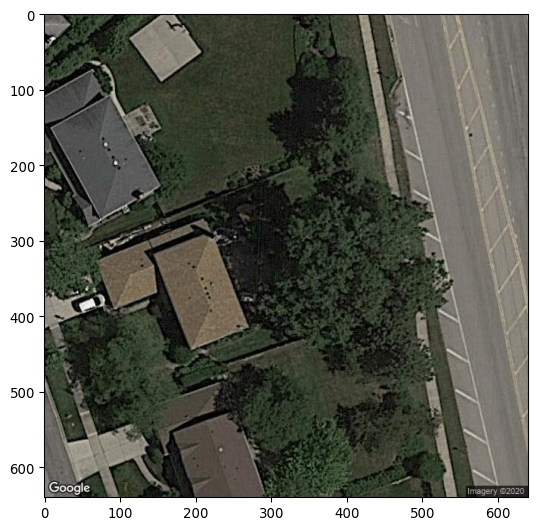

In [2]:
import imageio
import imgaug as ia
%matplotlib inline

image = imageio.imread('labeledImg/image-0_42.150377999999996_-87.883777.jpg')

print("Original:")
ia.imshow(image)

In [12]:
print(image)

Array([[[ 98,  99,  93],
        [ 91,  92,  86],
        [ 92,  93,  87],
        ...,
        [131, 128, 123],
        [150, 147, 142],
        [136, 133, 128]],

       [[102, 103,  98],
        [ 97,  98,  93],
        [ 98,  99,  94],
        ...,
        [128, 125, 120],
        [150, 147, 142],
        [140, 137, 132]],

       [[109, 110, 105],
        [106, 107, 102],
        [107, 108, 103],
        ...,
        [123, 120, 115],
        [149, 146, 141],
        [146, 143, 138]],

       ...,

       [[133, 129, 118],
        [126, 122, 111],
        [123, 119, 108],
        ...,
        [ 37,  36,  34],
        [ 29,  28,  26],
        [ 33,  32,  30]],

       [[136, 132, 121],
        [130, 126, 115],
        [127, 123, 112],
        ...,
        [ 36,  35,  33],
        [ 46,  45,  43],
        [ 37,  36,  34]],

       [[140, 136, 124],
        [135, 131, 120],
        [132, 128, 117],
        ...,
        [ 23,  22,  20],
        [ 47,  46,  44],
        [ 34,  33,  31]]

Augmented:


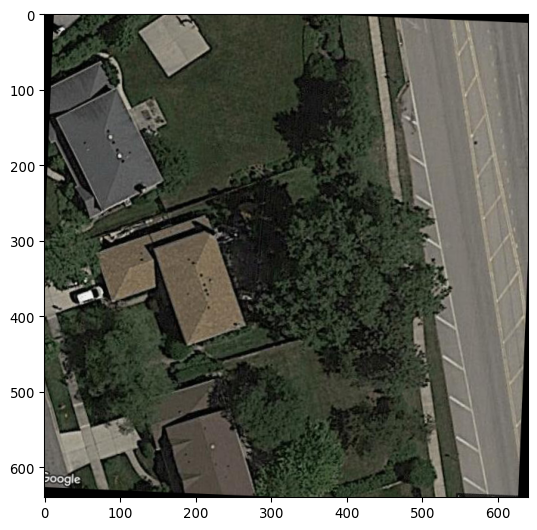

In [3]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate(image=image)

print("Augmented:")
ia.imshow(image_aug)

In [18]:
H,W = image.shape[0], image.shape[1]

In [31]:
# the next part is on visualizing the bounding boxes
# x - x-coordinate(in pixels) of the center of the bounding box
# y – y-coordinate(in pixels) of the center of the bounding box
# w – width(in pixels) of the bounding box
# h – height(in pixels) of the bounding box
# W – width(in pixels) of the whole image
# H – height(in pixels) of the whole image

# yolo format: center-x, center-y, width, height
# bb0 = class id
# bb1 = center-x = x/W 
# bb2 = center-y = y/H
# bb3 = width = w/W
# bb4 = height = h/H

import numpy as np
yolo_bb = np.loadtxt('labeledImg/image-0_42.150377999999996_-87.883777.txt')
# convert yolo bounding box to imgaug format
imgaug_bb = np.zeros(yolo_bb.shape)
for n, bb in enumerate(yolo_bb):
    class_id = bb[0]
    center_x, center_y, w, h = bb[1] * W, bb[2] * H, bb[3] * W, bb[4] * H
    x1 = center_x - w / 2
    y1 = center_y - h / 2
    x2 = center_x + w / 2
    y2 = center_y + h / 2
    imgaug_bb[n] = np.array([class_id, x1, y1, x2, y2])

In [32]:
print('This is YOLO label format:')
print(yolo_bb)
print('This is imgaug label format:')
print(imgaug_bb)

This is YOLO label format:
[[1.       0.276562 0.572656 0.29375  0.257812]
 [1.       0.123438 0.276562 0.228125 0.284375]
 [1.       0.344531 0.9      0.254688 0.2     ]]
This is imgaug label format:
[[  1.       82.99968 284.      270.99968 448.99968]
 [  1.        6.00032  85.99968 152.00032 267.99968]
 [  1.      138.99968 512.      302.      640.     ]]


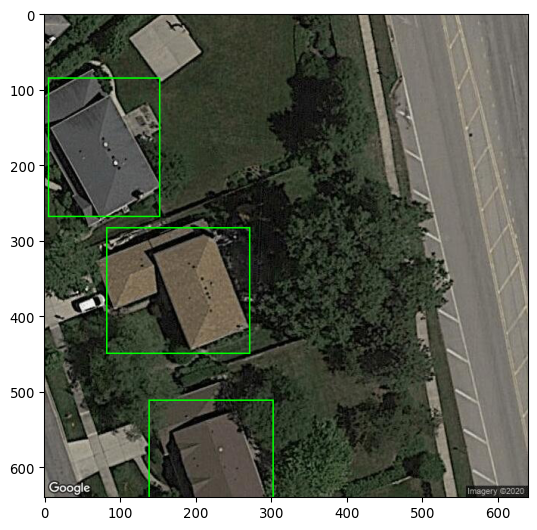

In [4]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
%matplotlib inline
ia.seed(1)

# resize img
# image = ia.imresize_single_image(image, (298, 447))

bbs = BoundingBoxesOnImage([
    BoundingBox(x1 = 82.99968, y1 = 284., x2 = 270.99968, y2 = 448.99968),
    BoundingBox(6.00032, 85.99968, 152.00032, 267.99968),
    BoundingBox(138.99968, 512., 302., 640.)
#     BoundingBox(x1 = 82.99968, y1 = 284., x2 = 270.99968, y2 = 448.99968)  
], shape=image.shape)

ia.imshow(bbs.draw_on_image(image, size=2))

In [5]:
from imgaug import augmenters as iaa 
ia.seed(1)

seq = iaa.Sequential([
    iaa.GammaContrast(1.5),
    iaa.Affine(translate_percent={"x": 0.1}, scale=0.8)
])

In [6]:
image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)

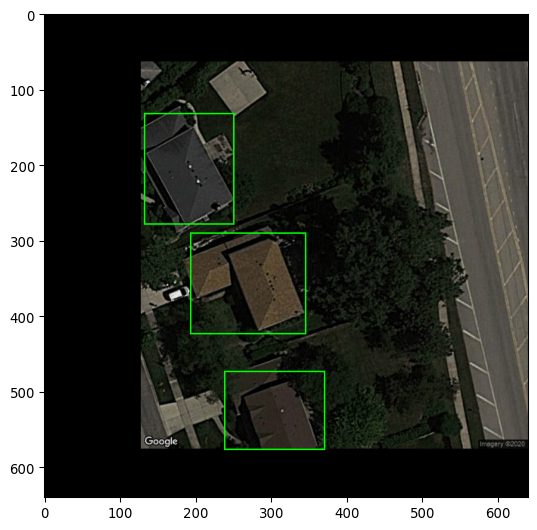

In [7]:
ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))

In [8]:
image_points = image.copy()
rot = iaa.Affine(rotate=30)
image_points_aug, bbs_aug = rot(image=image_points, bounding_boxes=bbs)

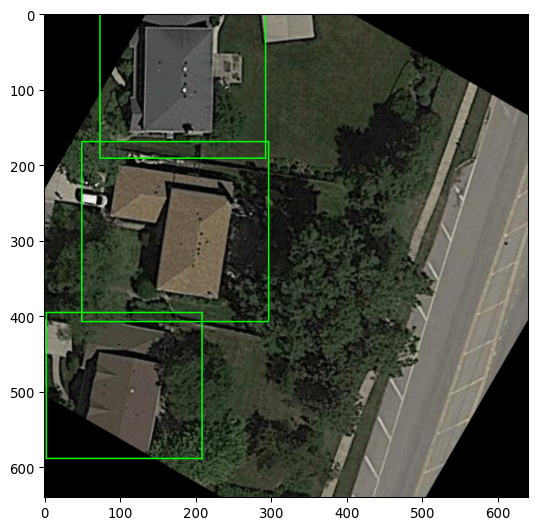

In [9]:
ia.imshow(bbs_aug.draw_on_image(image_points_aug, size=2))